##Logistic Function

- Used to model categorical outcome based on categorical / continuous features
- Model categorical outcome (1/0) as a continuous probability
- Predicted probability > 0.5 will be classed as outcome 1, and vice versa

<br>

$$p(Y=1 \ | \ X) = \frac{1}{1 + e^{-w^TX}}$$

$$p(Y=0 \ | \ X) = 1- p(Y=1 \ | \ X) = \frac{e^{-w^TX}}{1 + e^{-w^TX}}$$



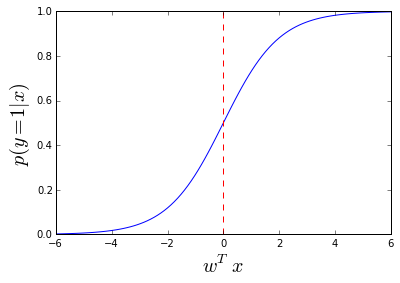

In [9]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def logit(wx):
    return 1 / (1 + np.exp(-wx))

wx = np.linspace(-6, 6, 100)
y = logit(wx)
plt.plot(wx, y)
plt.xlabel('$w^Tx$', fontsize=20)
plt.ylabel('$p(y=1 | x)$', fontsize=20)
plt.axvline(x=0, c='r', ls='--')

##Interpretation

Consider modeling the probability of getting lung cancer with 2 variables: 
- Number of cigarette smoked per day ($X_1$)
- Number of minutes of exercise per day ($X_2$)

$$p(Y=1 \ | \ X) = \frac{1}{1 + e^{-(\beta_1X_1 + \beta_2X_2 + \epsilon)}}$$

$$p(Y=1 \ | \ X) +  p(Y=1 \ | \ X)e^{-(\beta_1X_1 + \beta_2X_2 + \epsilon)} = 1$$

$$-(\beta_1X_1 + \beta_2X_2 + \epsilon) = log(\frac{1 - p(Y=1 \ | \ X)}{p(Y=1 \ | \ X)})$$

$$\beta_1X_1 + \beta_2X_2 + \epsilon = log(\frac{p(Y=1 \ | \ X)}{1 - p(Y=1 \ | \ X)})$$

$$e^{\beta_1X_1 + \beta_2X_2 + \epsilon} = \frac{p(Y=1 \ | \ X)}{1 - p(Y=1 \ | \ X)}$$


If $\beta_1 = 1.3$, the odds of getting lung cancer increases by **a factor of**  $e^{1.3}$ for every extra cigarette you smoke a day

So the increase of odds of getting lung cancer is **different by increasing from 3 to 4 cigarettes compared to increasing from 10 to 11**

##Likelihood

- Likelihood of the set of $\beta$ specified in the model predicting all the data points correctly

$$L(\beta) = \prod_{i=1}^n p(y_i=1 \ | \ x_i)^{y_i} p(y_i=0 \ | \ x_i)^{1-y_i}$$

- This will be a small number with a lot of data points as one would image
- Would suffer from numerical underflow

##Negative log likelihood

- Since likelihood suffers from numerical underflow, we take the log and multiplication becomes addition
- We also take the negative, so we can minimizing instead of maximizing the log likelihood
- Also known as **cross entropy function**

$$NLL(\beta) = \sum_{i=1}^{n} y_i log(p(y_i=1 \ | \ x_i)) + (1-y_i)p(y_i=0 \ | \ x_i)$$